# original format

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import xml.etree.ElementTree as ET

from functions import yolo_to_pascal
from functions import bbox_to_rect

0it [00:00, ?it/s]

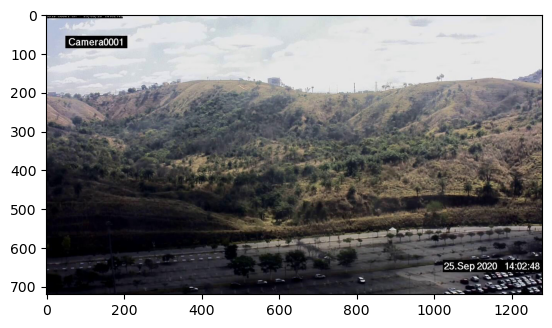

In [3]:
imageIndex = 'AoF01011'
imagePath = '../D-Fire/train/images/{}.jpg'.format(imageIndex)
# imagePath = '../D-Fire/test/images/{}.jpg'.format(imageIndex)
txtPath = '../D-Fire/train/labels/{}.txt'.format(imageIndex)
# txtPath = '../D-Fire/test/labels/{}.txt'.format(imageIndex)

with open(txtPath, 'r') as f:
    txtRead = [x.strip() for x in f.readlines()]

labelList = np.zeros((len(txtRead),1))
bboxes = np.zeros((len(txtRead),4))

for idx, line in tqdm(enumerate(txtRead)):
    labelList[idx] = line[0]
    bboxes[idx] = line.split()[1:]

imageArray = plt.imread(imagePath)

imageWidth = imageArray.shape[1]
imageHeight = imageArray.shape[0]

fig = plt.imshow(imageArray)
for bbox in bboxes:
    pascalBbox = yolo_to_pascal(bbox, imageWidth=imageWidth, imageHeight=imageHeight)
    fig.axes.add_patch(bbox_to_rect(pascalBbox, 'blue'))

# pascal format

0it [00:00, ?it/s]

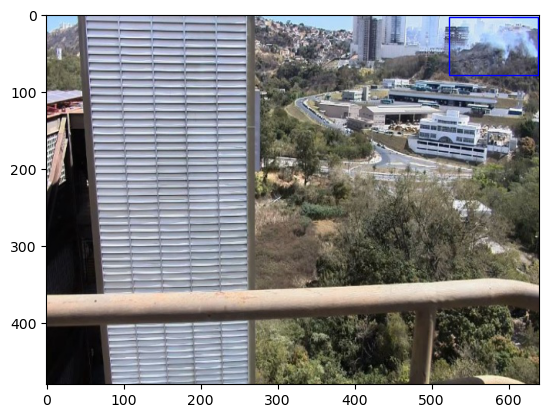

In [9]:
imageIndex = 'AoF06112'
imagePath = '../D-Fire/JPEGImages/{}.jpg'.format(imageIndex)
xmlPath = '../D-Fire/Annotations/{}.xml'.format(imageIndex)

# loading bounding boxes in xml
tree = ET.parse(xmlPath)
annotation = tree.getroot()
objects = annotation.findall('object')
objectNum = len(objects)
bboxes = np.zeros((objectNum,4))
for idx, object in tqdm(enumerate(objects)):
    bboxes[idx][0] = object.find('bndbox').find('xmin').text
    bboxes[idx][1] = object.find('bndbox').find('ymin').text
    bboxes[idx][2] = object.find('bndbox').find('xmax').text
    bboxes[idx][3] = object.find('bndbox').find('ymax').text

imageArray = plt.imread(imagePath)
fig = plt.imshow(imageArray)
for bbox in bboxes:
    fig.axes.add_patch(bbox_to_rect(bbox, 'blue'))